In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
data = pd.read_csv("dataset_group.csv")

In [3]:
data.head()

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose


In [4]:
data.tail()

,Date,Order_id,Product
20636,2020-02-25,1138,soda
20637,2020-02-25,1138,paper towels
20638,2020-02-26,1139,soda
20639,2020-02-26,1139,laundry detergent
20640,2020-02-26,1139,shampoo


In [5]:
#Check Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [6]:
data.describe()

,Order_id
count,20641.000000
mean,575.986289
std,328.557078
min,1.000000
25%,292.000000
50%,581.000000
75%,862.000000
max,1139.000000


In [7]:
#check Duplicates
data.duplicated().sum()

4730

In [8]:
data['Product'] = data['Product'].str.lower()

In [9]:
data

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose
...,...,...,...
20636,2020-02-25,1138,soda
20637,2020-02-25,1138,paper towels
20638,2020-02-26,1139,soda
20639,2020-02-26,1139,laundry detergent


In [10]:
data.shape

(20641, 3)

In [11]:
data = data.drop(data[data.Product == 'none'].index)

In [12]:
data.shape

(20641, 3)

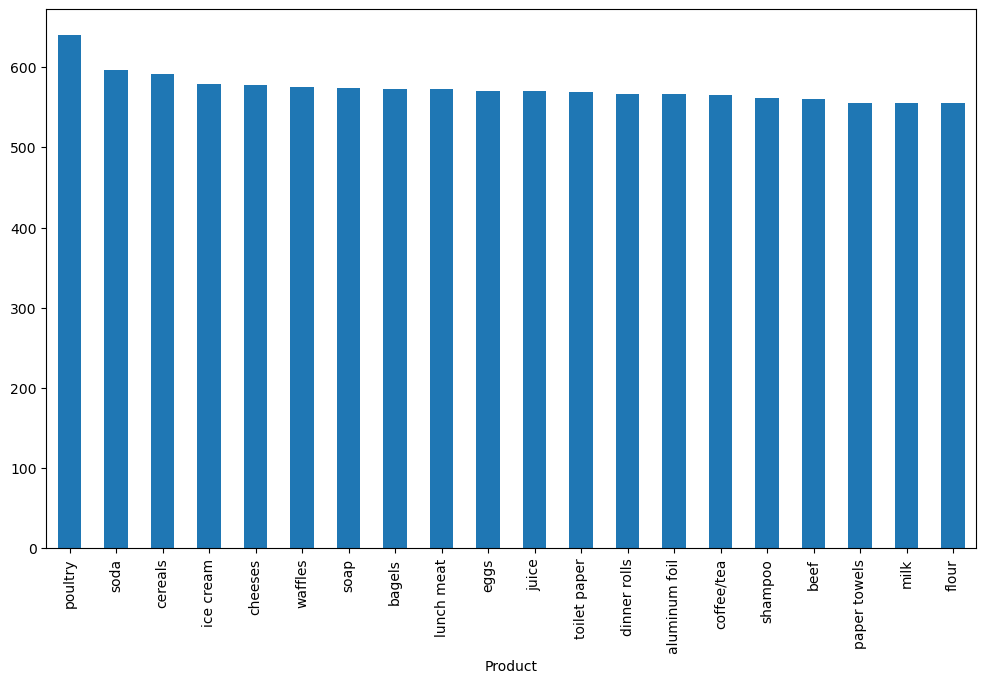

In [13]:
#product wise distribution
data['Product'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(12,7));

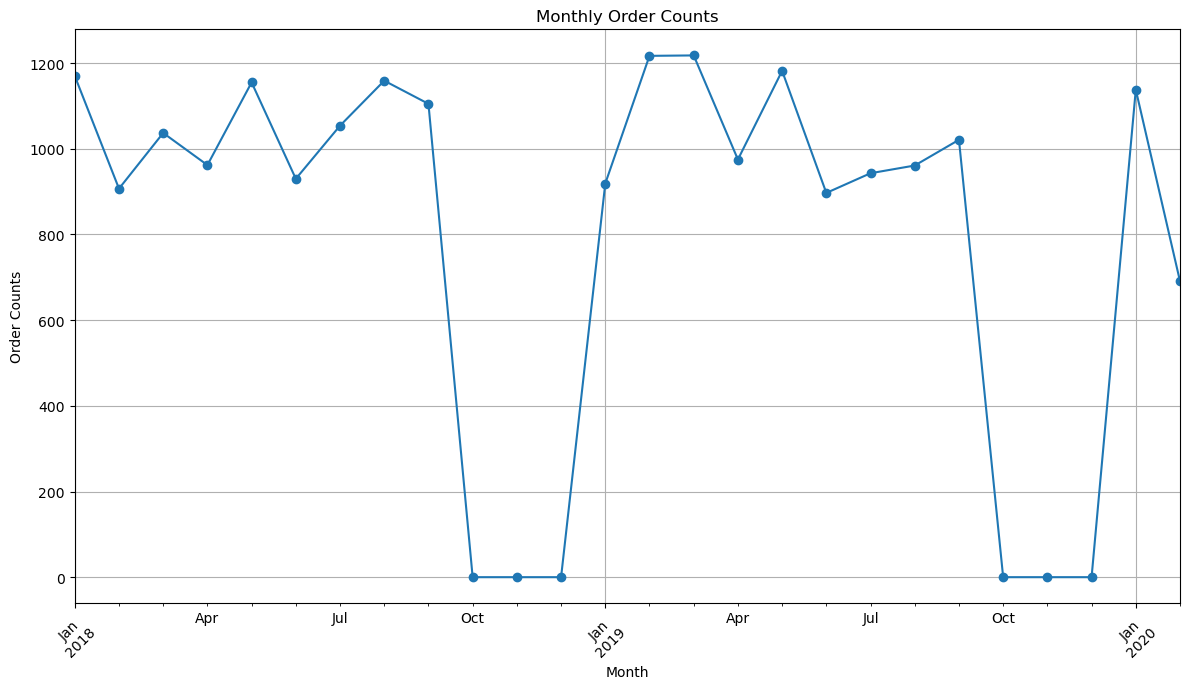

In [14]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Resample the data to get monthly order counts
monthly_order_counts = data.resample('M', on='Date').size()

# Plot the line chart
plt.figure(figsize=(12, 7))
monthly_order_counts.plot(kind='line', marker='o')  # Added a marker for each data point
plt.title('Monthly Order Counts')
plt.xlabel('Month')
plt.ylabel('Order Counts')
plt.grid(True)  # Added grid for better readability
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()


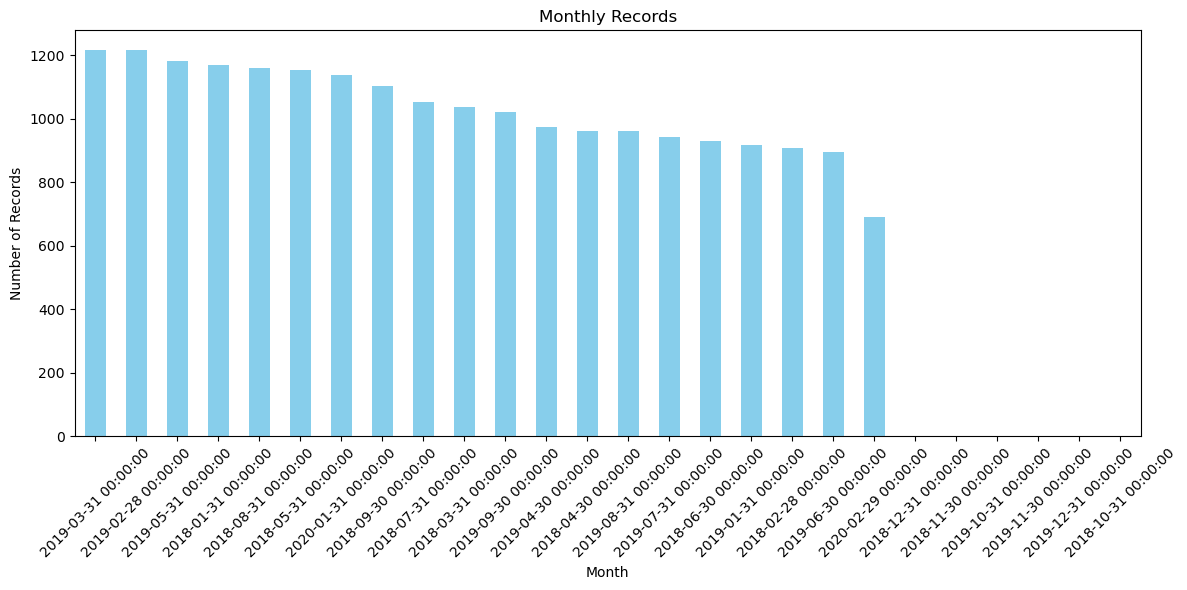

In [15]:
# Convert the 'Date' column to datetime format if not already in that format
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index of the DataFrame
data.set_index('Date', inplace=True)

# Resample to get monthly order counts
monthly_order_counts = data.resample('M').size().sort_values(ascending=False)

# Plot the bar chart for monthly order counts
plt.figure(figsize=(12, 6))
monthly_order_counts.plot(kind='bar', color='skyblue')
plt.title('Monthly Records')
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

In [16]:
#!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [17]:
basket=data.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [18]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [19]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [20]:
basket=basket.applymap(encode_zero_one)

In [21]:
itemsets = apriori(basket, min_support = 0.01, use_colnames = True, low_memory=True)
itemsets

C:\Users\akans\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
610567,0.010536,"(sandwich bags, pork, ketchup, soap, spaghetti..."
610568,0.011414,"(sandwich bags, waffles, ketchup, soap, spaghe..."
610569,0.010536,"(poultry, sandwich loaves, laundry detergent, ..."
610570,0.011414,"(sandwich bags, poultry, shampoo, milk, lunch ..."


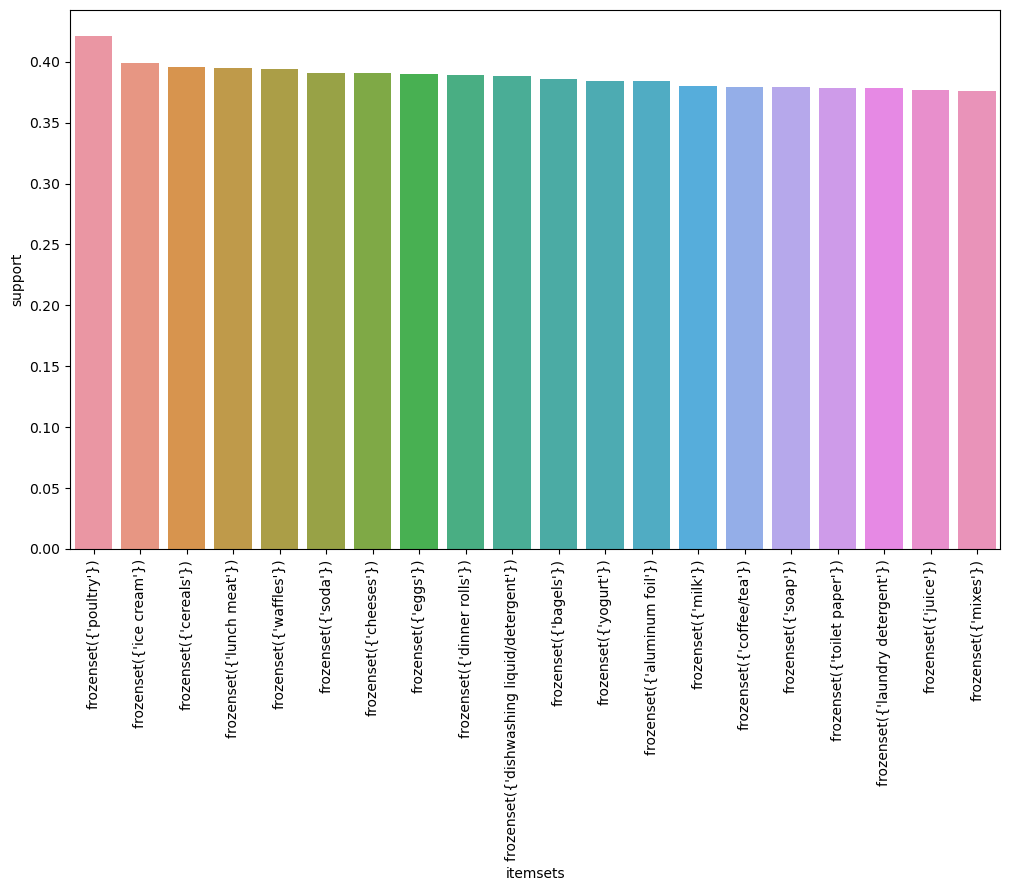

In [22]:
plt.figure(figsize=(12,7))
sns.barplot(
    x=itemsets.sort_values('support', ascending=False).iloc[0:20, 1],
    y=itemsets.sort_values('support', ascending=False).iloc[0:20, 0]
)
plt.xticks(rotation=90)
plt.show()

# Check the rules using association_rules

In [23]:
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 

In [24]:
basket.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
21916462,"(ketchup, sandwich bags, sugar, all- purpose)","(laundry detergent, soap, flour)",0.023705,0.058824,0.011414,0.481481,8.185185,0.010019,1.815126,0.899142
21916519,"(laundry detergent, soap, flour)","(ketchup, sandwich bags, sugar, all- purpose)",0.058824,0.023705,0.011414,0.194030,8.185185,0.010019,1.211329,0.932692
21907007,"(coffee/tea, toilet paper, all- purpose, fruits)","(beef, butter, cereals)",0.022827,0.058824,0.010536,0.461538,7.846154,0.009193,1.747899,0.892932
21907074,"(beef, butter, cereals)","(coffee/tea, toilet paper, all- purpose, fruits)",0.058824,0.022827,0.010536,0.179104,7.846154,0.009193,1.190374,0.927083
22026344,"(individual meals, pork, milk, ice cream)","(shampoo, cereals, sandwich loaves)",0.020193,0.067603,0.010536,0.521739,7.717674,0.009170,1.949557,0.888366
22026381,"(shampoo, cereals, sandwich loaves)","(individual meals, pork, milk, ice cream)",0.067603,0.020193,0.010536,0.155844,7.717674,0.009170,1.160694,0.933537
22029879,"(ketchup, cheeses, lunch meat, milk)","(soap, coffee/tea, pork)",0.022827,0.065847,0.011414,0.500000,7.593333,0.009910,1.868306,0.888589
22029902,"(soap, coffee/tea, pork)","(ketchup, cheeses, lunch meat, milk)",0.065847,0.022827,0.011414,0.173333,7.593333,0.009910,1.182064,0.929511
21916478,"(ketchup, laundry detergent, sugar, all- purpose)","(sandwich bags, soap, flour)",0.025461,0.059701,0.011414,0.448276,7.508621,0.009893,1.704291,0.889466
21916503,"(sandwich bags, soap, flour)","(ketchup, laundry detergent, sugar, all- purpose)",0.059701,0.025461,0.011414,0.191176,7.508621,0.009893,1.204885,0.921856


# The End